In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path = ['', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python27.zip', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-darwin', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac/lib-scriptpackages', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-tk', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-old', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-dynload', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages', '/Library/Python/2.7/site-packages']
import scipy as sp
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

kiva = pd.read_csv("kiva_total.csv")
kiva.head()


,Unnamed: 0,business_description,business_name,city,conversations,disbursed,industry,invited_lenders,listed,loan_id,...,borrower_ethnicity,gender,borrower_education,borrower_internet_frequency,borrower_primary_language,business_url,business_twitter_url,business_facebook_url,business_yelp_url,social_media
0,839,"Business Description\rIn 2009, I rented a gara...",Pacific Brewing Laboratory,"San Francisco, CA",7.0,12/9/11,Food production,0,11/28/11,15,...,caucasian,male,college,daily,English,http://www.pacbrewlab.com,NaN,NaN,NaN,1
1,841,Business Description\rNeighborhood Coffee Shop...,Cafeto Coffee Shop,"San Francisco, CA",15.0,12/21/11,Restaurant / Caterers,0,11/29/11,17,...,hispanic,male,primary,weekly,Spanish,NaN,NaN,NaN,http://www.yelp.com/biz/cafeto-san-francisco,1
2,318,"Business Description\rHello everyone, please a...",Nail Studio,"San Francisco, CA",NaN,12/21/11,Beauty / Cosmetics,0,11/29/11,18,...,hispanic,female,college,daily,Other,NaN,NaN,NaN,NaN,0
3,316,Business Description\rSaafara is a line of pre...,"Saafara Tea (Group Helene Samb, LLC)","San Francisco, CA",14.0,12/23/11,Food production,0,12/14/11,19,...,african_american,male,college,daily,"Wolof, French and English",http://saafara.com,NaN,NaN,NaN,1
4,1383,Business Description\rPFC is a San Francisco H...,Planet Fillmore Communications (PFC),"San Francisco, CA",5.0,12/23/11,Communications / Media,0,12/6/11,21,...,african_american,male,college,daily,English,http://www.youtube.com/user/PlanetFillmore,NaN,NaN,NaN,1


In [418]:
kiva['Bucket_new'] = kiva.Bucket.map({1:1, 2:1,3:1,6:0,7:0})
kiva.describe()

,Unnamed: 0,conversations,invited_lenders,loan_id,size,term,total_lenders,days_fundraising,Bucket,social_media,Bucket_new,trustee_new
count,2414.000000,2347.000000,2414.000000,2414.000000,2414.000000,2414.00000,2414.000000,2414.000000,2414.000000,2414.000000,1784.000000,2414.000000
mean,1207.137531,22.047720,14.932477,9760.903480,5412.323944,24.76802,97.431234,-2256.648302,4.201326,1.975559,0.508969,0.749793
std,697.406483,28.024778,12.621855,6426.984214,2617.437965,8.76847,72.048972,9430.101606,1.875326,1.216947,0.500060,0.433222
min,0.000000,1.000000,0.000000,15.000000,100.000000,3.00000,1.000000,-41020.000000,1.000000,0.000000,0.000000,0.000000
25%,603.250000,7.000000,4.000000,3254.750000,4981.250000,24.00000,45.000000,16.000000,2.000000,1.000000,0.000000,0.250000
50%,1207.500000,14.000000,14.000000,10768.500000,5000.000000,24.00000,79.000000,37.000000,5.000000,2.000000,1.000000,1.000000
75%,1810.750000,27.000000,23.000000,16666.750000,5000.000000,24.00000,131.000000,54.000000,6.000000,3.000000,1.000000,1.000000
max,2414.000000,349.000000,103.000000,18276.000000,25000.000000,125.00000,507.000000,155.000000,7.000000,4.000000,1.000000,1.000000


In [401]:
# drop a problematic loan (1787) that has the wrong loan size

kiva.drop([1787], inplace=True)
kiva[['loan_id', 'size']].sort_index(by='size')


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,loan_id,size
260,1194,100
1601,14908,200
355,1554,200
874,5296,300
1615,15127,300
2414,18276,300
872,5292,400
1501,13796,450
1609,15005,500
1605,14943,500


In [349]:
# convert all city/state to uppercase and then separate out the state

kiva['city'] = kiva['city'].str.upper()
kiva.city

kiva['state'] = kiva.city.str[-2] + kiva.city.str[-1]
print kiva.state.value_counts()

CA    665
NY    322
PA    236
WI     95
OR     91
MI     89
VA     84
KY     73
AR     68
NJ     65
IL     52
DC     51
OH     50
TX     41
FL     32
MA     31
AZ     28
MD     26
CO     25
MO     25
IN     23
PR     23
MN     23
GA     22
WA     22
HI     21
NC     17
ME     12
AK     12
TN     11
CT     10
LA      8
AL      7
NM      6
MT      6
UT      5
SC      5
ND      4
VT      4
IA      4
NV      3
ID      2
WV      2
DE      2
NH      2
OK      2
GU      2
SD      1
Z)      1
NE      1
RI      1
A       1
Name: state, dtype: int64


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: order is deprecated, use sort_values(...)


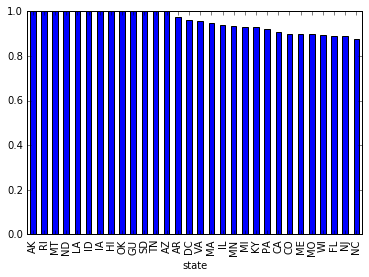

In [350]:
# some states fundraise better than others

kiva.groupby('state').Bucket_new.mean().order(ascending=False)
kiva.groupby('state').Bucket_new.mean().order(ascending=False).head(30).plot(kind='bar')

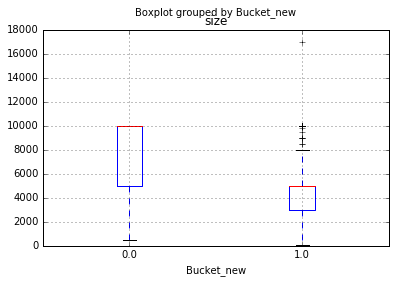

In [296]:
# Loan size: larger loans fail to fundraise more frequently (Bucket_new = 0)

kiva.boxplot(column='size', by='Bucket_new')


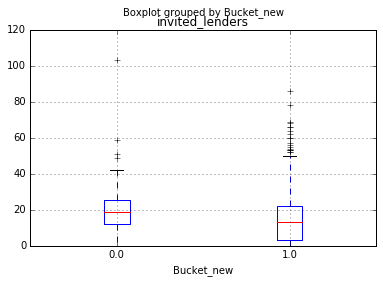

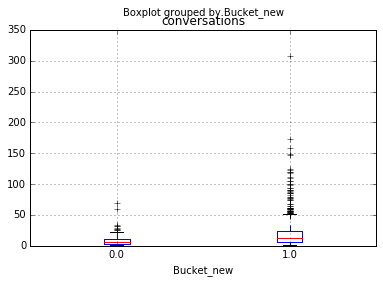

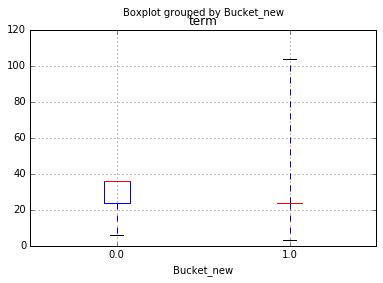

In [297]:
kiva.boxplot(column='invited_lenders', by='Bucket_new')

# successfully fundraised borrowers (Bucket_new = 1) have more conversations with potential lenders (shows engagement)
kiva.boxplot(column='conversations', by='Bucket_new')

# successfully fundraised borrowers (Bucket_new = 1) are shorter in term (lenders want to get their $ back faster)
kiva.boxplot(column='term', by='Bucket_new')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: order is deprecated, use sort_values(...)


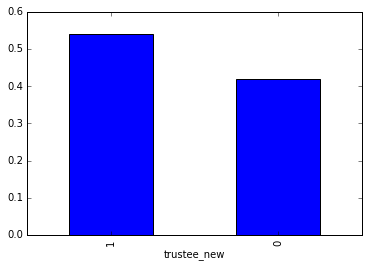

In [419]:
# trustee = entity/individual that endorses a loan and the borrower's credit worthiness
# "Borrowers Network " = no trustee (trustee_new = 0), everything else means there is a trustee (trustee_new = 1)

kiva['trustee_new'] = [0 if x == "Borrowers Network " else 1 for x in kiva.trustee]
kiva.groupby('trustee_new').Bucket_new.mean().order(ascending=False).head(15).plot(kind='bar')

# bar chart shows having a trustee helps

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


Food production                     418
Agriculture                         276
Restaurant / Caterers               213
Services                            196
Retail - General                    186
Clothing / Jewelry / Accessories    168
Other                               138
Arts / Crafts                       129
Beauty / Cosmetics                  111
Social Enterprise                    76
Technology                           66
Education                            63
Entertainment                        60
Communications / Media               42
Cleaning Services                    41
Non-Profit                           40
Retail - Wholesale                   34
Construction / Contractor            31
Transportation                       22
Day care / Adult care                20
Real estate / Rental                 16
Repair / Mechanic                    15
Lawn / Landscaping service           14
Florist                              14
Furniture / Household items          13


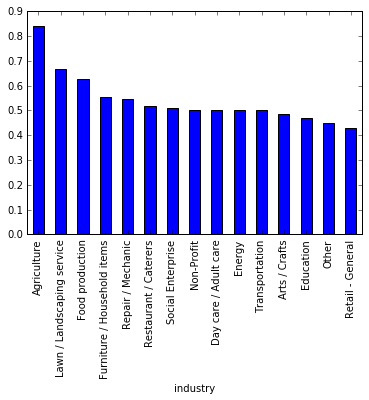

In [536]:
kiva.groupby('industry').Bucket_new.mean().order(ascending=False)
kiva.groupby('industry').Bucket_new.mean().order(ascending=False).head(15).plot(kind='bar')
kiva.industry.value_counts()




In [538]:
kiva['industry_new'] = [1 if x == "Agriculture" else 0 for x in kiva.industry]
#kiva.groupby('trustee_new').Bucket_new.mean().order(ascending=False).head(15).plot(kind='bar')
#industry_dummies = pd.get_dummies(kiva.industry, prefix='pindustry')
#industry_dummies.drop(industry_dummies.columns[0], axis=1, inplace=True)
#kiva = pd.concat([kiva, industry_dummies])
# kiva.columns
#or x == "Agriculture" or x == "Restaurant / Caterers"

kiva[['industry','industry_new']]

,industry,industry_new
0,Food production,0
1,Restaurant / Caterers,0
2,Beauty / Cosmetics,0
3,Food production,0
4,Communications / Media,0
5,Entertainment,0
6,Construction / Contractor,0
7,Clothing / Jewelry / Accessories,0
8,Food production,0
9,Clothing / Jewelry / Accessories,0


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


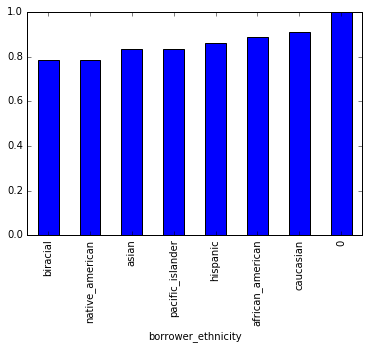

In [312]:
kiva.groupby('borrower_ethnicity').Bucket_new.mean().order(ascending=True).plot(kind='bar') 
ethnicity_dummies = pd.get_dummies(kiva.borrower_ethnicity, prefix='ethnicity')
ethnicity_dummies.drop(ethnicity_dummies.columns[0], axis=1, inplace=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


1 year - 3 years     730
6 months - 1 year    496
More than 5 years    413
New Business         359
3 years - 5 years    306
<6 months            110
Name: years_experience, dtype: int64

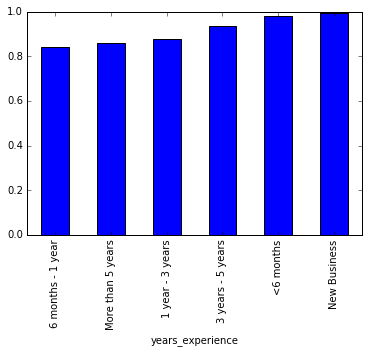

In [310]:
kiva.groupby('years_experience').Bucket_new.mean().order(ascending=True).head(15).plot(kind='bar')

kiva.years_experience.value_counts()

# lenders are more likely to give to businesses that are new

In [539]:
import sys
sys.path = ['', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python27.zip', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-darwin', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac/lib-scriptpackages', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-tk', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-old', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-dynload', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages', '/Library/Python/2.7/site-packages']
import scipy as sp
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

In [540]:
# combine all text
kiva['text'] = kiva.loan_purpose +' '+ kiva.personal_story + " "+ kiva.business_description

In [554]:


features_cols = ['text', 'size', 'Bucket_new', 'trustee_new', 'conversations', 'invited_lenders', 'term']  
#+ list(kiva.columns[24:49]) shows the industries

kiva_truncated = kiva[features_cols]

kiva_truncated = kiva_truncated.dropna()

def f(x): return x.decode('utf-8', 'ignore')
kiva_truncated.text = kiva_truncated.text.apply(f)

kiva_truncated 




,text,size,Bucket_new,trustee_new,conversations,invited_lenders,term
0,What is the purpose of this loan?\rThis loan w...,2000.0,1.0,1.0,7.0,0.0,12.0
1,What is the purpose of this loan?\rFinish cons...,5000.0,1.0,1.0,15.0,0.0,12.0
3,"What is the purpose of this loan?\rThis loan, ...",5000.0,1.0,1.0,14.0,0.0,12.0
4,What is the purpose of this loan?\rTo upgrade ...,3000.0,1.0,1.0,5.0,0.0,12.0
5,What is the purpose of this loan?\rThe loan am...,5000.0,1.0,1.0,4.0,0.0,12.0
7,What is the purpose of this loan?\rI will be s...,5000.0,1.0,1.0,7.0,1.0,12.0
10,What is the purpose of this loan?\rThe loan wi...,1350.0,1.0,1.0,12.0,2.0,12.0
11,What is the purpose of this loan?\rThis loan w...,5000.0,1.0,1.0,16.0,1.0,12.0
12,What is the purpose of this loan?\rThis loan w...,5000.0,1.0,1.0,11.0,0.0,12.0
13,What is the purpose of this loan?\rThe purpose...,5000.0,1.0,1.0,8.0,0.0,12.0


In [555]:
kiva.columns

Index([u'Bucket', u'Bucket_new', u'Unnamed: 0', u'borrower_education',
       u'borrower_ethnicity', u'borrower_internet_frequency',
       u'borrower_primary_language', u'business_description',
       u'business_facebook_url', u'business_name', u'business_twitter_url',
       u'business_url', u'business_yelp_url', u'city', u'conversations',
       u'days_fundraising', u'disbursed', u'gender', u'industry',
       u'industry_new', u'invited_lenders', u'listed', u'loan_id',
       u'loan_purpose', u'personal_story', u'pindustry_Arts / Crafts',
       u'pindustry_Beauty / Cosmetics', u'pindustry_Cleaning Services',
       u'pindustry_Clothing / Jewelry / Accessories',
       u'pindustry_Communications / Media',
       u'pindustry_Construction / Contractor',
       u'pindustry_Day care / Adult care', u'pindustry_Education',
       u'pindustry_Energy', u'pindustry_Entertainment', u'pindustry_Florist',
       u'pindustry_Food production', u'pindustry_Food stall / Grocer',
       u'pindustry_

In [556]:
y = kiva_truncated.Bucket_new
print y.value_counts()

1.0    871
0.0    852
Name: Bucket_new, dtype: int64


In [557]:
print 871.0/(871+852)

list(y.value_counts())[0] / float(y.shape[0])


0.505513639002


0.50551363900174118

In [558]:
print X.shape
print y.shape

(2414, 5)
(1723,)


In [559]:
X_train, X_test, y_train, y_test = train_test_split(kiva_truncated.drop('Bucket_new', axis=1), y, random_state=1)
X_train.head()

,text,size,trustee_new,conversations,invited_lenders,term
1594,What is the purpose of this loan?\rThis loan w...,5000.0,0.0,3.0,14.0,24.0
764,What is the purpose of this loan?\rThe primary...,5000.0,1.0,39.0,21.0,24.0
1939,What is the purpose of this loan?\rThe Fun wit...,5000.0,1.0,16.0,35.0,24.0
1305,What is the purpose of this loan?\rWith this l...,2500.0,0.0,11.0,16.0,12.0
1317,What is the purpose of this loan?\r1 Month ren...,5000.0,1.0,31.0,21.0,24.0


In [560]:
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train.text)
X_test_dtm = vect.transform(X_test.text)


In [561]:
X_train_dtm.shape

(1292, 24117)

In [562]:
vect.get_feature_names()[4000:]

[u'celebramos',
 u'celebrate',
 u'celebrated',
 u'celebrates',
 u'celebrating',
 u'celebration',
 u'celebrations',
 u'celebratory',
 u'celebrities',
 u'celebrity',
 u'celiac',
 u'celiacs',
 u'cell',
 u'cellar',
 u'cellist',
 u'cellmate',
 u'cello',
 u'cellophane',
 u'cellphone',
 u'cells',
 u'cellular',
 u'celtx',
 u'cement',
 u'cemented',
 u'cemeteries',
 u'censorship',
 u'census',
 u'cent',
 u'center',
 u'centered',
 u'centerpiece',
 u'centerpieces',
 u'centerpoint',
 u'centers',
 u'centerville',
 u'centigrade',
 u'central',
 u'centralized',
 u'centrally',
 u'centre',
 u'centric',
 u'centro',
 u'cents',
 u'centuries',
 u'century',
 u'ceo',
 u'ceos',
 u'ceramic',
 u'ceramicist',
 u'ceramics',
 u'ceramist',
 u'cerberus',
 u'cerca',
 u'cereal',
 u'cereals',
 u'cerebral',
 u'ceremonial',
 u'ceremonies',
 u'ceremony',
 u'ceres',
 u'cerified',
 u'cert',
 u'certain',
 u'certainly',
 u'certainty',
 u'certificar',
 u'certificate',
 u'certificates',
 u'certification',
 u'certifications',
 u'ce

In [563]:
vect = CountVectorizer(ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape
X_test_dtm = vect.transform(X_test)
# including 1 grams and 2 grams

In [564]:
# last 50 features
vect.get_feature_names()[-50:]

[u'conversations',
 u'invited_lenders',
 u'size',
 u'term',
 u'text',
 u'trustee_new']

In [565]:
kiva_truncated.isnull().sum()

text               0
size               0
Bucket_new         0
trustee_new        0
conversations      0
invited_lenders    0
term               0
dtype: int64

In [566]:
# adjusting for how rare the word is, then weigh it higher 
vect = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, min_df=2)
X_train_dtm = vect.fit_transform(X_train.text) 
X_test_dtm = vect.transform(X_test.text)


# changing matrix to dataframe
X_train_dtm_as_df = pd.DataFrame(X_train_dtm.toarray(), columns = vect.get_feature_names())
X_train_dtm_as_df.merge(X_train, how='left', left_index=True, right_index=True)

# changing matrix to dataframe
X_test_dtm_as_df = pd.DataFrame(X_test_dtm.toarray(), columns = vect.get_feature_names())
X_test_dtm_as_df.merge(X_test, how='left', left_index=True, right_index=True)

print X_test_dtm_as_df

logreg = LogisticRegression()
logreg.fit(X_train_dtm_as_df, y_train)

y_pred_class = logreg.predict(X_test_dtm_as_df)

# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)


################
#X_train_dtm_as_df['loan_size'] = list(X_train['size'])
#X_test_dtm_as_df['loan_size'] = list(X_test['size'])
#X_test_dtm_as_df['loan_sentiment'] = list(X_test['sentiment'])
# # use default options for CountVectorizer
# vect = CountVectorizer()
# # create document-term matrices :: only single words
# X_train_dtm = vect.fit_transform(X_train)
# X_test_dtm = vect.transform(X_test)


           00       000        10       100      1000        12        15  \
0    0.000000  0.000000  0.057105  0.000000  0.000000  0.000000  0.036362   
1    0.000000  0.023976  0.000000  0.000000  0.000000  0.000000  0.000000   
2    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3    0.000000  0.000000  0.000000  0.000000  0.046117  0.000000  0.000000   
4    0.000000  0.023572  0.000000  0.000000  0.000000  0.000000  0.000000   
5    0.000000  0.000000  0.000000  0.049666  0.000000  0.000000  0.000000   
6    0.000000  0.059218  0.000000  0.000000  0.000000  0.000000  0.000000   
7    0.000000  0.045480  0.055869  0.042335  0.000000  0.000000  0.000000   
8    0.000000  0.000000  0.000000  0.114316  0.000000  0.000000  0.000000   
9    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10   0.000000  0.025723  0.000000  0.000000  0.000000  0.000000  0.000000   
11   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.043268   

0.6403712296983759

In [533]:
#print vect.get_feature_names()

#X_train_dtm_as_df = pd.DataFrame(X_train_dtm.toarray(), columns = vect.get_feature_names())

#vect.get_feature_names

vect_fd = pd.DataFrame(X_train_dtm.toarray(),columns= vect.get_feature_names())
temp = vect_fd.describe().head(2)

temp2 = temp.transpose()


#kiva.groupby('trustee_new').Bucket_new.mean().order(ascending=False).head(15).plot(kind='bar')


In [534]:
temp2['mean'].order(ascending=False)


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


business          0.085233
food              0.047588
loan              0.046614
farm              0.041108
new               0.038816
community         0.038234
years             0.038219
help              0.035576
work              0.035031
time              0.034247
people            0.034172
family            0.032521
local             0.032490
life              0.029594
products          0.029474
make              0.029330
customers         0.028619
able              0.027119
company           0.027092
small             0.026701
working           0.025965
school            0.025655
started           0.025637
like              0.024090
need              0.024047
year              0.024021
love              0.023688
personal          0.023652
product           0.023348
market            0.023119
                    ...   
tea               0.004250
security          0.004246
overall           0.004243
member            0.004242
role              0.004241
completed         0.004234
f

In [457]:
##### is KNN important here?

knn = KNeighborsClassifier(5)
cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

ValueError: Found arrays with inconsistent numbers of samples: [1723 2414]

In [377]:
    # print words with the top 5 TF-IDF scores
    print 'TOP SCORING WORDS:'
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print word




######### END ########

In [375]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

feature_cols = ['size', 'invited_lenders', 'conversations', 'term', 'trustee_new'] 
X = kiva[feature_cols]

logreg = LogisticRegression()
cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

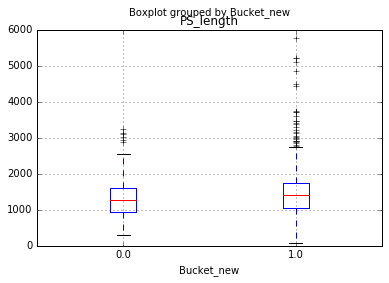

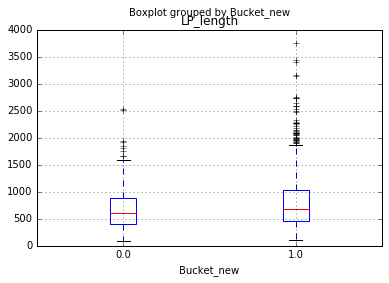

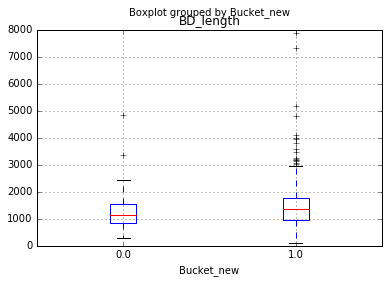

In [234]:
# this code is to calculate the length of text (business_description, personal_story and loan_purpose)

kiva["BD_length"] = kiva.business_description.apply(lambda x: len(x))
kiva["LP_length"] = kiva.loan_purpose.apply(lambda x: len(x))
kiva["PS_length"] = kiva.personal_story.apply(lambda x: len(x))

kiva.boxplot(column='PS_length', by='Bucket_new')
kiva.boxplot(column='LP_length', by='Bucket_new')
kiva.boxplot(column='BD_length', by='Bucket_new') 


In [372]:
#this code is to look at trustees

kiva['trustee_new'] = [0 if x == "Borrowers Network " else 1 for x in kiva.trustee]
print kiva.trustee_new.value_counts()

1    1810
0     604
Name: trustee_new, dtype: int64


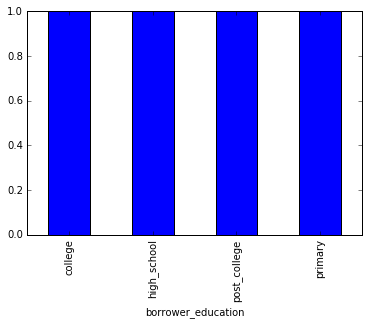

In [302]:
# this code is to look at a borrower's education level but does not reveal much
kiva.groupby('borrower_education').Bucket_new.mean().plot(kind='bar') 
borrower_education_dummies = pd.get_dummies(kiva.borrower_education, prefix='peducation')
borrower_education_dummies.drop(borrower_education_dummies.columns[0], axis=1, inplace=True)

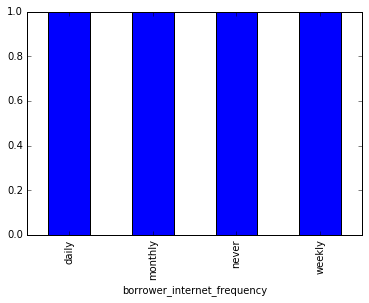

In [303]:
kiva.groupby('borrower_internet_frequency').Bucket_new.mean().plot(kind='bar') 
borrower_internet_dummies = pd.get_dummies(kiva.borrower_internet_frequency, prefix='pinternet')
borrower_internet_dummies.drop(borrower_internet_dummies.columns[0], axis=1, inplace=True)

#this shows that the more you frequent the website the more likely you will fundraise

1.0    1362
0.0     122
Name: borrower_primary_language_binary, dtype: int64


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


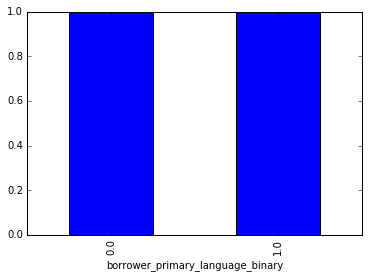

In [308]:
kiva['borrower_primary_language_binary'] = kiva.borrower_primary_language.map({'English':1, 'Other':0, 'Spanish':0, 'Kikuyu':0, 'Wolof, French and English':0, 'Russian':0})
print kiva.borrower_primary_language_binary.value_counts()
kiva.groupby('borrower_primary_language_binary').Bucket_new.mean().order(ascending=True).plot(kind='bar') 

# this shows that english speakers (1) fundraise faster

In [374]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


feature_cols = ['size', 'invited_lenders', 'conversations', 'term', 'trustee_new'] 


X = kiva[feature_cols]
X = X.fillna(0)
y = kiva.Bucket_new

logreg = LogisticRegression()
cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [445]:
import sys
sys.path = ['', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python27.zip', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-darwin', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac/lib-scriptpackages', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-tk', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-old', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-dynload', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages', '/Library/Python/2.7/site-packages']
import pandas as pd
import numpy as np
import scipy as sp
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline


def detect_sentiment(string):
    return TextBlob(string).sentiment.polarity

kiva_truncated['sentiment'] = kiva_truncated.text.apply(detect_sentiment)

In [455]:
kiva_truncated.sentiment.order(ascending=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


320    -0.028524
2256   -0.027415
868    -0.017302
2093   -0.009450
1083    0.000000
1855    0.000104
2323    0.001442
1501    0.011512
1904    0.011931
1047    0.015802
1367    0.017153
2041    0.017386
2081    0.018826
733     0.020363
2118    0.023313
921     0.025253
48      0.026053
776     0.026648
912     0.026874
232     0.028333
209     0.030041
421     0.030128
23      0.033214
2122    0.033887
1440    0.035610
779     0.035812
1878    0.039392
2125    0.040251
2094    0.041689
2128    0.042381
          ...   
2318    0.327709
1957    0.327932
809     0.328000
1698    0.328671
2119    0.329641
1382    0.330792
2103    0.332025
1919    0.332722
1646    0.333730
2192    0.334524
54      0.336261
1050    0.336655
867     0.340561
839     0.340805
1177    0.343570
1627    0.344797
2108    0.347782
1826    0.348420
283     0.350980
692     0.351627
1796    0.354386
174     0.357453
2054    0.359421
596     0.362928
2140    0.363020
1205    0.363495
1990    0.365522
219     0.3786

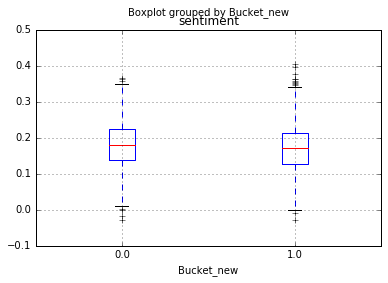

In [451]:
kiva_truncated.boxplot(column='sentiment', by='Bucket_new')
